In [1]:
import pandas as pd
import tweepy as tp
import os
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# Temprature in woodmere ny

In [2]:
temp = pd.read_csv('USW00094789-temperature-degreeF.csv')

In [3]:
temp.date = pd.Series([str(i) for i in temp['date']])

In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28292 entries, 0 to 28291
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        28292 non-null  object 
 1   min         26689 non-null  float64
 2   max         26689 non-null  float64
 3   normal_min  28292 non-null  float64
 4   normal_max  28292 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.1+ MB


In [5]:
temp.head()

,date,min,max,normal_min,normal_max
0,19480717,64.0,74.0,69.1,84.0
1,19480718,70.0,81.0,69.2,84.0
2,19480719,70.0,85.0,69.2,84.0
3,19480720,69.0,84.0,69.2,84.0
4,19480721,71.0,85.0,69.3,84.0


In [6]:
Temp = []
s = ''
for i in temp.date:
  s += i[:4]
  s+=' '
  s+=i[4:6]
  s+=' '
  s+=i[6:]
  Temp.append(s)
  s=''

In [7]:
temp.date = pd.Series([datetime( int( i.split(' ')[0] ),int( i.split(' ')[1] ),int( i.split(' ')[2] ) ) for i in Temp])

In [8]:
temp.date.min()

Timestamp('1948-07-17 00:00:00')

In [9]:
temp.date.max()

Timestamp('2025-12-31 00:00:00')

## Temp from 17 July 1948 To 17 July 2021

In [10]:
temp_To_Aug = temp[temp['date']<datetime(2021,7,18)]

In [11]:
temp_To_Aug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 26663
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        26664 non-null  datetime64[ns]
 1   min         26630 non-null  float64       
 2   max         26630 non-null  float64       
 3   normal_min  26664 non-null  float64       
 4   normal_max  26664 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.2 MB


In [12]:
temp_To_Aug.isna().sum()

date           0
min           34
max           34
normal_min     0
normal_max     0
dtype: int64

In [13]:
temp_To_Aug[temp_To_Aug['min'].isna()]

,date,min,max,normal_min,normal_max
777,1950-09-02,NaN,NaN,65.1,79.8
778,1950-09-03,NaN,NaN,64.9,79.6
856,1950-11-20,NaN,NaN,38.5,52.2
857,1950-11-21,NaN,NaN,38.2,51.9
904,1951-01-07,NaN,NaN,27.1,40.0
905,1951-01-08,NaN,NaN,26.9,39.8
928,1951-01-31,NaN,NaN,25.5,39.4
929,1951-02-01,NaN,NaN,25.6,39.5
1207,1951-11-06,NaN,NaN,42.5,57.1
1208,1951-11-07,NaN,NaN,42.2,56.7


In [14]:
Year = []
AvgMinimum = []
AvgMax = []
SumMin = 0.0
SumMax = 0.0
DayCount = 0.0
for i in temp_To_Aug.groupby(['date']).date:
  
  if not str(temp_To_Aug['min'].loc[i[1].index[0]]) == 'nan':
    
    if not (i[0].year in Year):
      
      if DayCount > 0:
        AvgMinimum.append(SumMin/DayCount)
        AvgMax.append(SumMax/DayCount)
      
      SumMin = 0
      SumMax = 0
      DayCount = 0
      Year.append(i[0].year)
    
    SumMin+=temp_To_Aug['min'].loc[i[1].index[0]]
    SumMax+=temp_To_Aug['max'].loc[i[1].index[0]]
    DayCount+=1
AvgMinimum.append(SumMin/DayCount)
AvgMax.append(SumMax/DayCount)

In [15]:
len(Year)

74

In [16]:
len(AvgMinimum)

74

In [17]:
len(AvgMax)

74

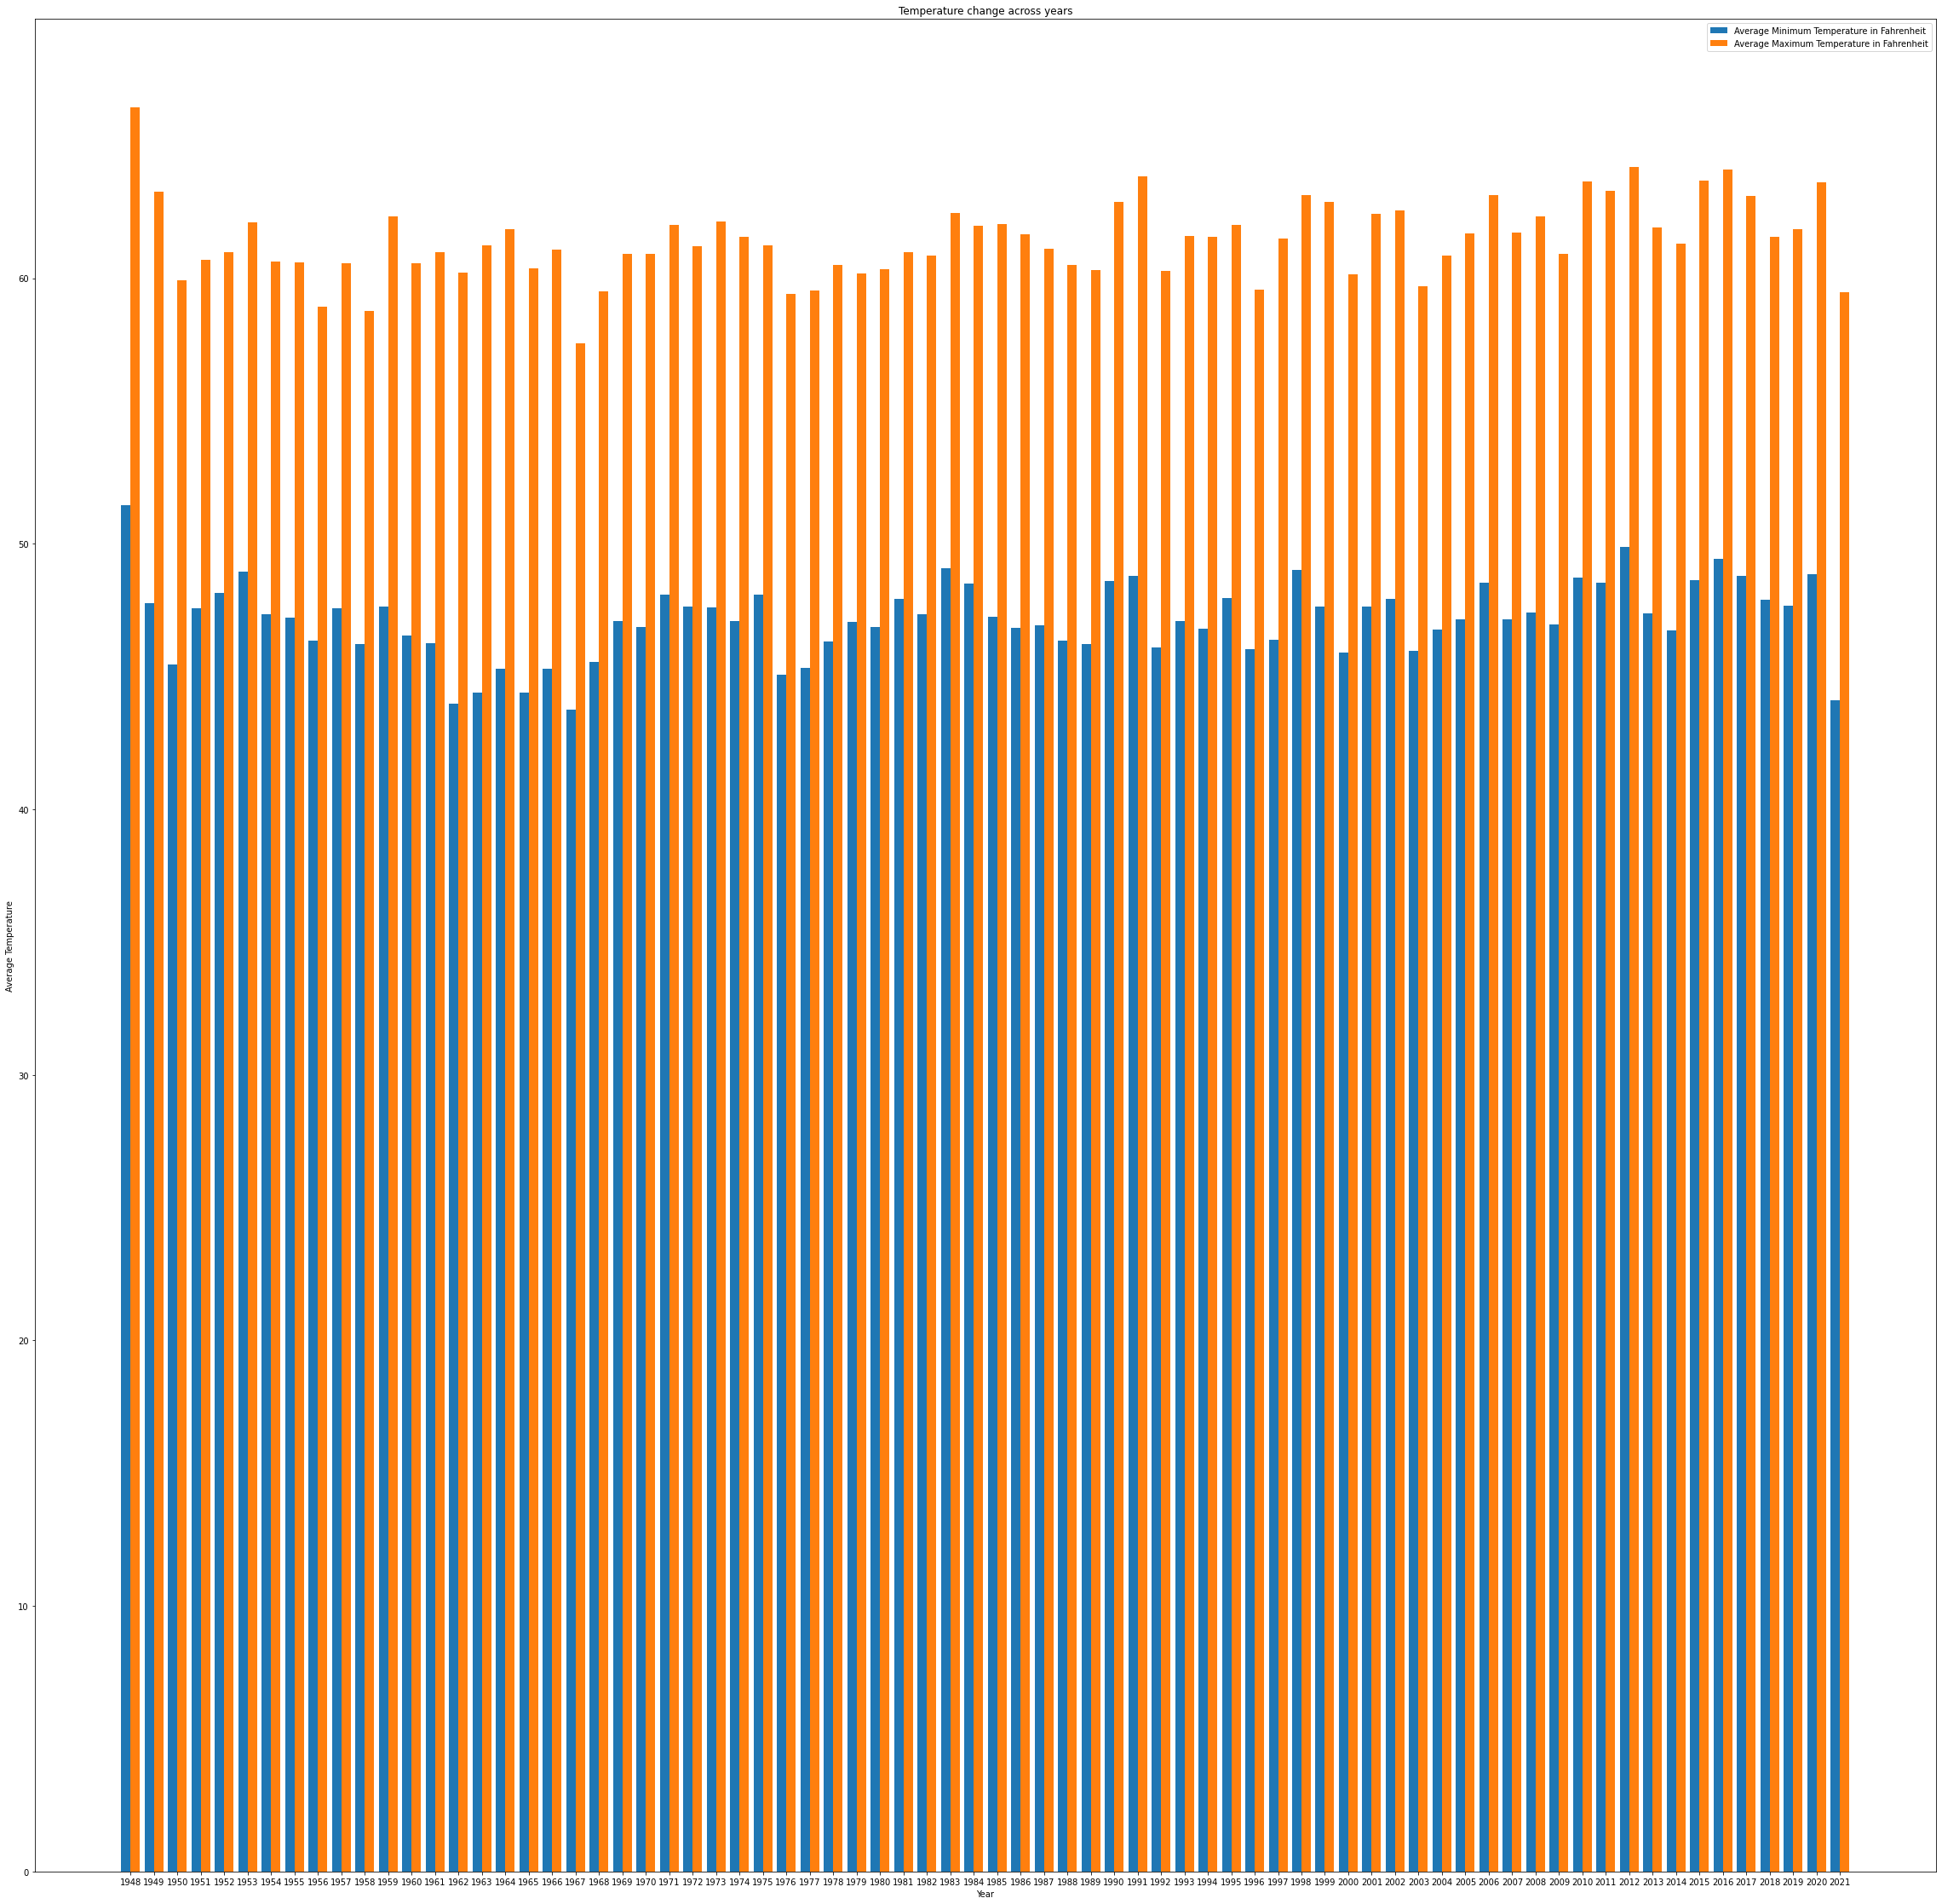

In [18]:
Year_Axis = np.arange(len(Year))
plt.figure(figsize=(40,40))
plt.bar(Year_Axis-0.2,AvgMinimum,0.4,label='Average Minimum Temperature in Fahrenheit')
plt.bar(Year_Axis+0.2,AvgMax,0.4,label='Average Maximum Temperature in Fahrenheit')
plt.xticks(Year_Axis,Year)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Temperature change across years')
plt.legend()
plt.show()

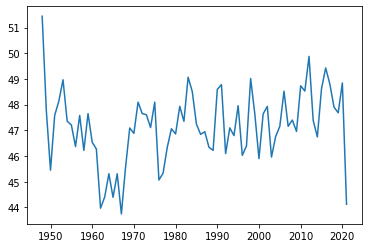

In [19]:
pd.Series(AvgMinimum,index=Year).plot()

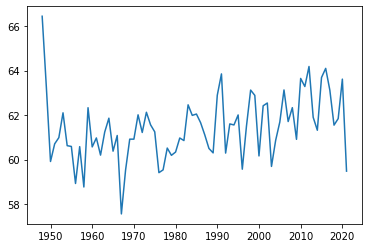

In [20]:
pd.Series(AvgMax,index=Year).plot()

# Precipitation

In [21]:
Per = pd.read_csv('USW00094789-JFK_INTL_AP-precipitation-inch.csv')

In [22]:
Per.date = pd.Series([str(i) for i in Per['date']])

In [23]:
Per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28292 entries, 0 to 28291
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  28292 non-null  object 
 1   precipitation         26553 non-null  object 
 2   precipitation_normal  28292 non-null  float64
dtypes: float64(1), object(2)
memory usage: 663.2+ KB


In [24]:
Per.isna().sum()

date                       0
precipitation           1739
precipitation_normal       0
dtype: int64

In [25]:
Per.duplicated().sum()

0

In [26]:
Per[Per['precipitation'] == 'T']

,date,precipitation,precipitation_normal
533,19500101,T,0.10
534,19500102,T,0.21
4916,19620101,T,0.10
5282,19630102,T,0.21
5283,19630103,T,0.31
5284,19630104,T,0.43
5285,19630105,T,0.54
5286,19630106,T,0.65
5287,19630107,T,0.76
5288,19630108,T,0.86


In [27]:
Per[Per['precipitation'].isna()]

,date,precipitation,precipitation_normal
1264,19520102,NaN,0.21
1265,19520103,NaN,0.31
1266,19520104,NaN,0.43
1267,19520105,NaN,0.54
1268,19520106,NaN,0.65
...,...,...,...
28287,20251227,NaN,42.84
28288,20251228,NaN,42.95
28289,20251229,NaN,43.07
28290,20251230,NaN,43.18


In [28]:
Per.head()

,date,precipitation,precipitation_normal
0,19480717,0.06,22.99
1,19480718,0.06,23.13
2,19480719,0.06,23.26
3,19480720,0.06,23.40
4,19480721,2.51,23.52


In [29]:
Temp = []
s = ''
for i in Per.date:
  s += i[:4]
  s+=' '
  s+=i[4:6]
  s+=' '
  s+=i[6:]
  Temp.append(s)
  s=''

In [30]:
Per.date = pd.Series([datetime( int( i.split(' ')[0] ),int( i.split(' ')[1] ),int( i.split(' ')[2] ) ) for i in Temp])

In [31]:
Per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28292 entries, 0 to 28291
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  28292 non-null  datetime64[ns]
 1   precipitation         26553 non-null  object        
 2   precipitation_normal  28292 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 663.2+ KB


In [32]:
Per.date.min()

Timestamp('1948-07-17 00:00:00')

In [33]:
Per.date.max()

Timestamp('2025-12-31 00:00:00')

In [34]:
Per_To_Aug = Per[Per['date']<datetime(2021,7,18)]

In [35]:
Per_To_Aug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 26663
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  26664 non-null  datetime64[ns]
 1   precipitation         26494 non-null  object        
 2   precipitation_normal  26664 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 833.2+ KB


In [36]:
Per_To_Aug.isna().sum()

date                      0
precipitation           170
precipitation_normal      0
dtype: int64

In [37]:
Year = []
AvgPer = []
SumPer = 0.0
DayCount = 0.0
for i in Per_To_Aug.groupby(['date']).date:
  
  if not (str(Per_To_Aug['precipitation'].loc[i[1].index[0]]) == 'nan' or str(Per_To_Aug['precipitation'].loc[i[1].index[0]]) == 'T'):
    
    if not (i[0].year in Year):
      
      if DayCount > 0:
        AvgPer.append(SumPer/DayCount)
        
      
      SumPer = 0
      DayCount = 0
      Year.append(i[0].year)
    
    SumPer+=float(Per_To_Aug['precipitation'].loc[i[1].index[0]])
    DayCount+=1
AvgPer.append(SumPer/DayCount)

In [38]:
len(Year)

74

In [39]:
len(AvgPer)

74

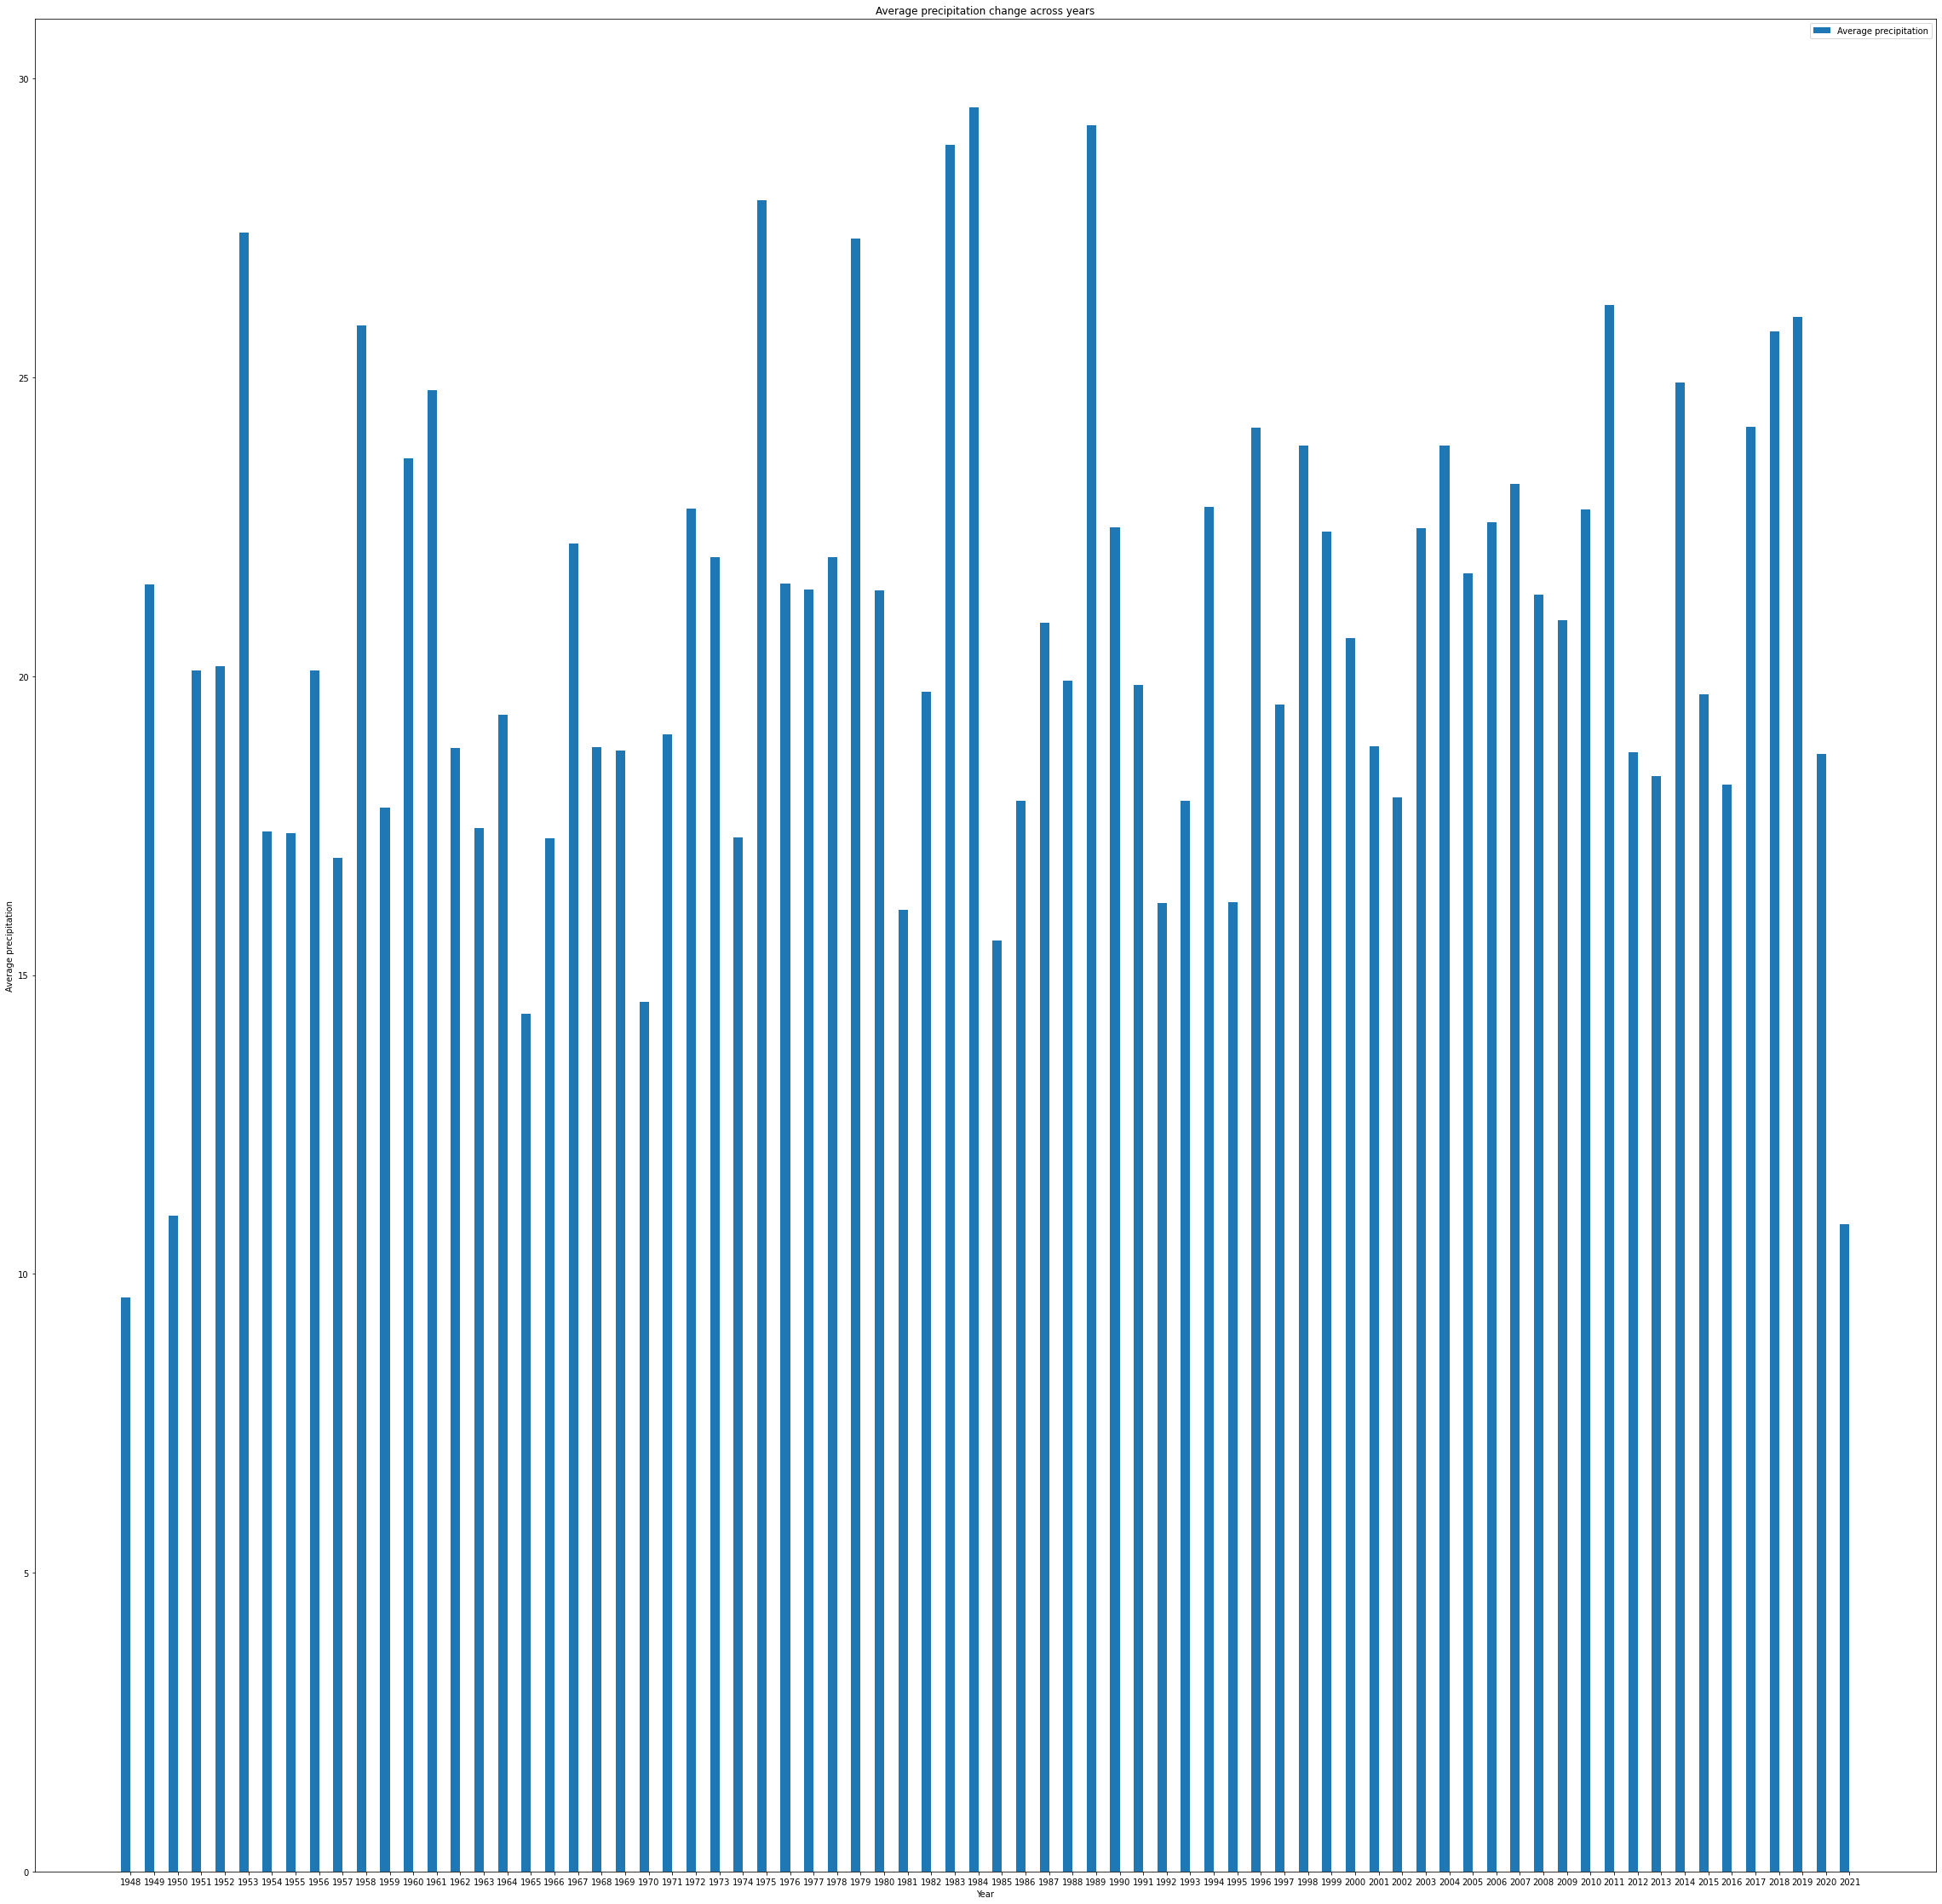

In [40]:
Year_Axis = np.arange(len(Year))
plt.figure(figsize=(40,40))
plt.bar(Year_Axis-0.2,AvgPer,0.4,label='Average precipitation')
plt.xticks(Year_Axis,Year)
plt.xlabel('Year')
plt.ylabel('Average precipitation')
plt.title('Average precipitation change across years')
plt.legend()
plt.show()

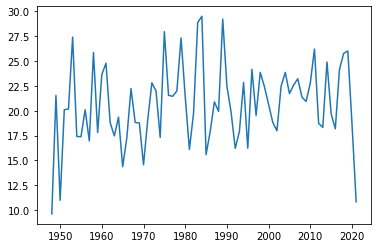

In [41]:
pd.Series(AvgPer,index=Year).plot()

# Diffrence in Avarage Sum of Temp in the last 2 dicades 

In [42]:
temp_2000_2010 = temp[temp['date']>=datetime(2000,1,1) ]
temp_2000_2010 = temp_2000_2010[temp_2000_2010['date']<datetime(2010,1,1) ]

In [43]:
temp_2000_2010.date.min()

Timestamp('2000-01-01 00:00:00')

In [44]:
temp_2000_2010.date.max()

Timestamp('2009-12-31 00:00:00')

In [45]:
temp_2010_2020 = temp[temp['date']>=datetime(2010,1,1) ]
temp_2010_2020 = temp_2010_2020[temp_2010_2020['date']<datetime(2021,1,1) ]

In [46]:
temp_2000_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3653 entries, 18795 to 22447
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3653 non-null   datetime64[ns]
 1   min         3653 non-null   float64       
 2   max         3653 non-null   float64       
 3   normal_min  3653 non-null   float64       
 4   normal_max  3653 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.2 KB


In [47]:
temp_2010_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4018 entries, 22448 to 26465
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        4018 non-null   datetime64[ns]
 1   min         4018 non-null   float64       
 2   max         4018 non-null   float64       
 3   normal_min  4018 non-null   float64       
 4   normal_max  4018 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 188.3 KB


In [48]:
temp_2010_2020.date.min()

Timestamp('2010-01-01 00:00:00')

In [49]:
temp_2010_2020.date.max()

Timestamp('2020-12-31 00:00:00')

In [50]:
temp_2000_2010.isna().sum()

date          0
min           0
max           0
normal_min    0
normal_max    0
dtype: int64

In [51]:
temp_2010_2020.isna().sum()

date          0
min           0
max           0
normal_min    0
normal_max    0
dtype: int64

In [52]:
temp_2000_2010.duplicated().sum()

0

In [53]:
temp_2010_2020.duplicated().sum()

0

In [54]:
Year = ['2000-2010','2010-2020']
Avgs_min = [temp_2000_2010['min'].mean(),temp_2010_2020['min'].mean()]
Avgs_max = [temp_2000_2010['max'].mean(),temp_2010_2020['max'].mean()]

In [55]:
df_diff_temp = pd.DataFrame({'Year':Year,"Avgs_min":Avgs_min,"Avgs_max":Avgs_max})

<Figure size 7200x7200 with 0 Axes>

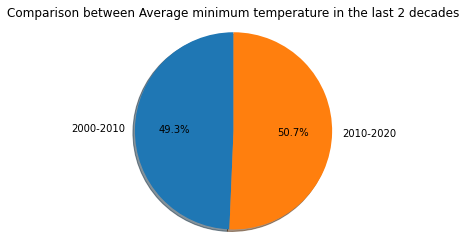

<Figure size 7200x7200 with 0 Axes>

In [56]:
plt.pie(Avgs_min,labels=Year,startangle=90,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Comparison between Average minimum temperature in the last 2 decades')
plt.figure(figsize=(100,100))

In [57]:
Avgs_min

[47.13742129756365, 48.41363862618218]

No handles with labels found to put in legend.


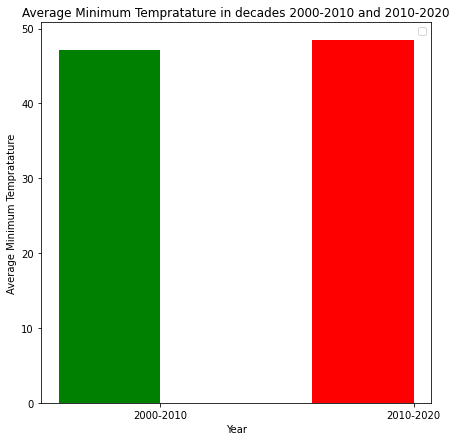

In [58]:
Year_Axis = np.arange(len(Year))
plt.figure(figsize=(7,7))
plt.bar(Year_Axis-0.2,Avgs_min,0.4,color=['green','red'])
plt.xticks(Year_Axis,Year)
plt.xlabel('Year')
plt.ylabel('Average Minimum Tempratature')
plt.title('Average Minimum Tempratature in decades 2000-2010 and 2010-2020')
plt.legend()
plt.show()

In [59]:
Avgs_max

[61.544757733369835, 62.931309109009455]

No handles with labels found to put in legend.


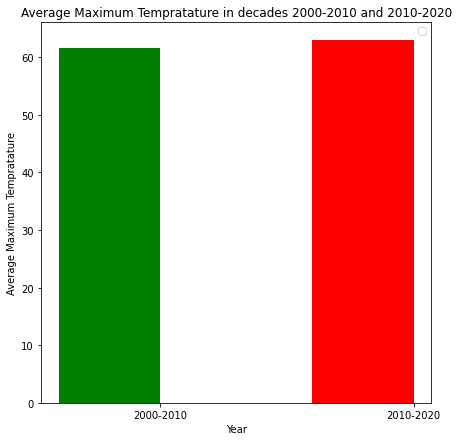

In [60]:
Year_Axis = np.arange(len(Year))
plt.figure(figsize=(7,7))
plt.bar(Year_Axis-0.2,Avgs_max,0.4,color=['green','red'])
plt.xticks(Year_Axis,Year)
plt.xlabel('Year')
plt.ylabel('Average Maximum Tempratature')
plt.title('Average Maximum Tempratature in decades 2000-2010 and 2010-2020')
plt.legend()
plt.show()

<Figure size 7200x7200 with 0 Axes>

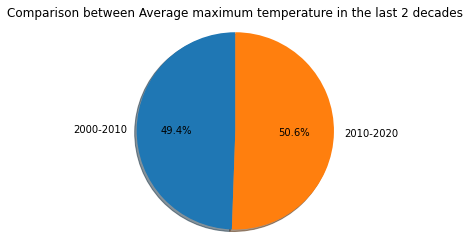

<Figure size 7200x7200 with 0 Axes>

In [61]:
plt.pie(Avgs_max,labels=Year,startangle=90,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Comparison between Average maximum temperature in the last 2 decades')
plt.figure(figsize=(100,100))

# Diffrence in Avarage Sum of precipitation in the last 2 dicades

In [62]:
Per_2000_2010 = Per[Per['date']>=datetime(2000,1,1) ]
Per_2000_2010 = Per_2000_2010[Per_2000_2010['date']<datetime(2010,1,1) ]
Per_2010_2020 = Per[Per['date']>=datetime(2010,1,1) ]
Per_2010_2020 = Per_2010_2020[Per_2010_2020['date']<datetime(2021,1,1) ]

In [63]:
Year = ['2000-2010','2010-2020']

In [64]:
Avgs_Per = []
SumPer = 0.0
DayCount = 0.0
for i in Per_2000_2010.precipitation:
 
  if not (i == 'T'):   
    SumPer+=float(i)
    DayCount+=1
Avgs_Per.append(SumPer/DayCount)

In [65]:
Avgs_Per

[21.35961601755345]

In [66]:
SumPer = 0.0
DayCount = 0.0
for i in Per_2010_2020.precipitation:
 
  if not (i == 'T'):   
    SumPer+=float(i)
    DayCount+=1
Avgs_Per.append(SumPer/DayCount)

In [67]:
Avgs_Per

[21.35961601755345, 22.137397806580296]

No handles with labels found to put in legend.


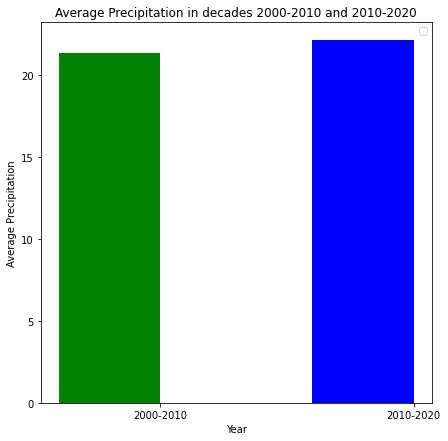

In [68]:
Year_Axis = np.arange(len(Year))
plt.figure(figsize=(7,7))
plt.bar(Year_Axis-0.2,Avgs_Per,0.4,color=['green','blue'])
plt.xticks(Year_Axis,Year)
plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.title('Average Precipitation in decades 2000-2010 and 2010-2020')
plt.legend()
plt.show()

<Figure size 7200x7200 with 0 Axes>

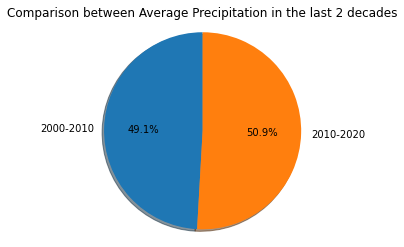

<Figure size 7200x7200 with 0 Axes>

In [69]:
plt.pie(Avgs_Per,labels=Year,startangle=90,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Comparison between Average Precipitation in the last 2 decades')
plt.figure(figsize=(100,100))

# Future Prediction

## Temprature

In [70]:
temp_2021_2025 = temp[temp['date']>=datetime(2021,12,31)]

In [71]:
temp_2021_2025.date.min()

Timestamp('2021-12-31 00:00:00')

In [72]:
temp_2021_2025.date.max()

Timestamp('2025-12-31 00:00:00')

In [73]:
temp_2021_2025.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 26830 to 28291
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1462 non-null   datetime64[ns]
 1   min         0 non-null      float64       
 2   max         0 non-null      float64       
 3   normal_min  1462 non-null   float64       
 4   normal_max  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 68.5 KB


In [74]:
temp_2021_2025['normal_min'].loc[26830]

28.5

In [75]:
Year = []
AvgMinimum = []
AvgMax = []
SumMin = 0.0
SumMax = 0.0
DayCount = 0.0
for i in temp_2021_2025.groupby(['date']).date:
  
  if not str(temp_2021_2025['normal_min'].loc[i[1].index[0]]) == 'nan':
    
    if not (i[0].year in Year):
      
      if DayCount > 0:
        AvgMinimum.append(SumMin/DayCount)
        AvgMax.append(SumMax/DayCount)
      
      SumMin = 0
      SumMax = 0
      DayCount = 0
      Year.append(i[0].year)
    
    SumMin+=temp_2021_2025['normal_min'].loc[i[1].index[0]]
    SumMax+=temp_2021_2025['normal_max'].loc[i[1].index[0]]
    DayCount+=1
AvgMinimum.append(SumMin/DayCount)
AvgMax.append(SumMax/DayCount)

In [76]:
Year

[2021, 2022, 2023, 2024, 2025]

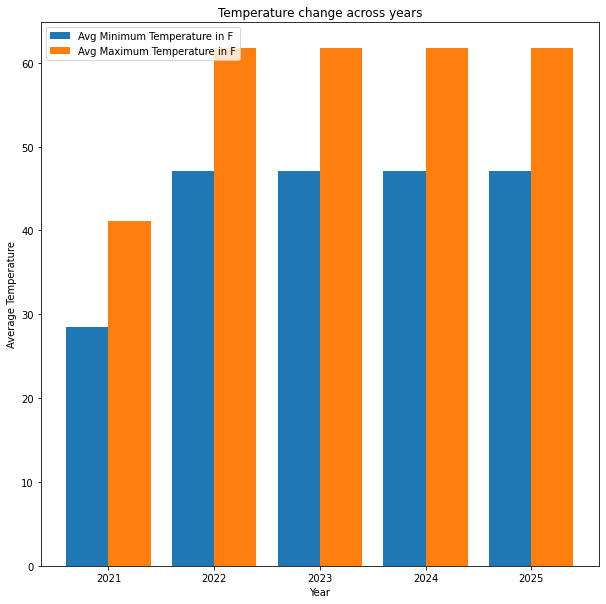

In [77]:
Year_Axis = np.arange(len(Year))
plt.figure(figsize=(10,10))
plt.bar(Year_Axis-0.2,AvgMinimum,0.4,label='Avg Minimum Temperature in F')
plt.bar(Year_Axis+0.2,AvgMax,0.4,label='Avg Maximum Temperature in F')
plt.xticks(Year_Axis,Year)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Temperature change across years')
plt.legend()
plt.show()

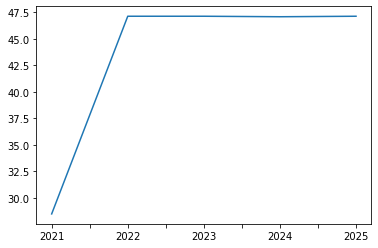

In [78]:
pd.Series(AvgMinimum,index=[str(i) for i in Year]).plot()

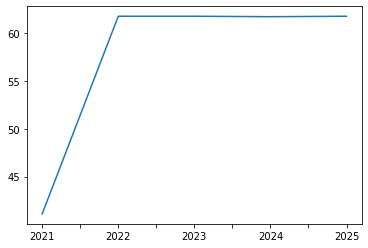

In [79]:
pd.Series(AvgMax,index=[str(i) for i in Year]).plot()

In [80]:
AvgMinimum

[28.5,
 47.11835616438357,
 47.11835616438357,
 47.07131147540984,
 47.11835616438357]

In [81]:
AvgMax

[41.1,
 61.75232876712328,
 61.75232876712328,
 61.70546448087431,
 61.75232876712328]